## AutoGen : Solve Maths Problems

AutoGen requires Python>=3.8<br>
pip install "pyautogen[mathchat]"

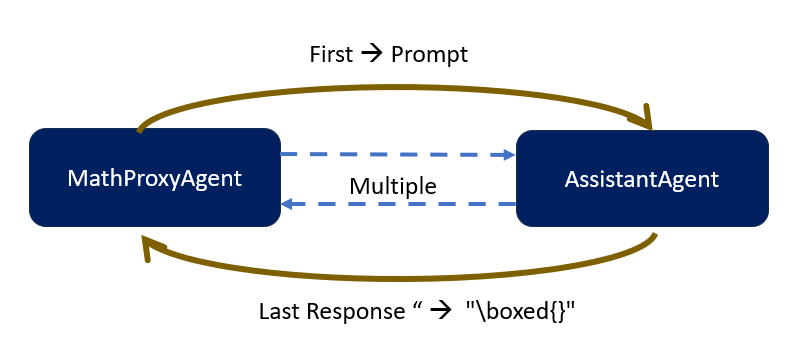

In [7]:
import autogen

In [8]:
config_list = [{'model': 'gpt-3.5-turbo', 'api_key': your_key},]

In [9]:
from autogen.agentchat.contrib.math_user_proxy_agent import MathUserProxyAgent

# Once logging is enabled, the ChatCompletion class logs each LLM call 
autogen.ChatCompletion.start_logging()

Create an AssistantAgent instance named "assistant"

In [10]:
assistant = autogen.AssistantAgent(
    name="assistant", 
    system_message="You are a helpful assistant.",
    llm_config={
        "request_timeout": 600,
        "seed": 42,
        "config_list": config_list,
    }
)


llm_config is a dictionary that specifies the configuration parameters for an LLM (large language model) application. <br>
request_timeout field : maximum time in seconds that the LLM will wait for a response from the server. <br>
seed field : the random seed used by the LLM. <br>
config_list field : a list of configurations that define the behavior of the LLM agent. <br>

Create the MathUserProxyAgent instance named "mathproxyagent"

In [11]:
mathproxyagent = MathUserProxyAgent(
    name="mathproxyagent", 
    human_input_mode="NEVER",
    code_execution_config={"use_docker": False},
)

MathUserProxyAgent is a class in the AutoGen framework that acts as a proxy for the user in a conversation with an LLM (large language model) assistant. It simulates a conversation between the user and the LLM assistant, where the user proxy agent communicates with the LLM assistant and continues the conversation in a desired manner. The MathUserProxyAgent class is used in conjunction with the AssistantAgent class to solve math problems using Autogen MathChat.

In your example, mathproxyagent is an instance of the MathUserProxyAgent class that is created with the following parameters:

name: A string that specifies the name of the agent.
human_input_mode: A string that specifies how human input should be handled. In this case, it is set to "NEVER", which means that human input is never used.
code_execution_config: A dictionary that specifies the configuration parameters for code execution. In this case, it is set to {"use_docker": False}, which means that Docker is not used for code execution

In [12]:
math_problem = """A tyre manufacturing company kept a record of the distance covered before a tyre needed to be replaced.
                The table shows the results of 1000 cases.
                Distance(in km)	Less than 4000	4000 to 9000	9001 to 14000	More than 14000
                Frequency	20	210	325	445
                If a tyre is bought from this company, what is the probability that :
                (i) it has to be substituted before 4000 km is covered?
                (ii) it will last more than 9000 km?
                (iii) it has to be replaced after 4000 km and 14000 km is covered by it?"""

In [13]:
# This initiates an automated chat between the two agents to solve the task
mathproxyagent.initiate_chat(assistant, problem=math_problem)

mathproxyagent (to assistant):

Let's use Python to solve a math problem.

Query requirements:
You should always use the 'print' function for the output and use fractions/radical forms instead of decimals.
You can use packages like sympy to help you.
You must follow the formats below to write your code:
```python
# your code
```

First state the key idea to solve the problem. You may choose from three ways to solve the problem:
Case 1: If the problem can be solved with Python code directly, please write a program to solve it. You can enumerate all possible arrangements if needed.
Case 2: If the problem is mostly reasoning, you can solve it by yourself directly.
Case 3: If the problem cannot be handled in the above two ways, please follow this process:
1. Solve the problem step by step (do not over-divide the steps).
2. Take out any queries that can be asked through Python (for example, any calculations or equations that can be calculated).
3. Wait for me to give the results.
4. Continu

SIGALRM is not supported on Windows. No timeout will be enforced.
SIGALRM is not supported on Windows. No timeout will be enforced.


mathproxyagent (to assistant):

Probability (i): 0.02
Probability (ii): 0.77
Probability (iii): 0.535

Error: Unknown language.

--------------------------------------------------------------------------------
assistant (to mathproxyagent):

Apologies for the error. Here are the probabilities in fraction form:

(i) The probability that a tyre has to be substituted before 4000 km is covered is \boxed{\frac{1}{50}}.
(ii) The probability that a tyre will last more than 9000 km is \boxed{\frac{77}{100}}.
(iii) The probability that a tyre has to be replaced after 4000 km and before 14000 km is covered is \boxed{\frac{107}{200}}.

--------------------------------------------------------------------------------
